# Lab Assignment 2
Name: **Rafiqul Islam** ; 
student id : **12123971**

### Task -1 Dimensionality Reduction, Principal Component Analysis
## a)

In [1]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.extmath import svd_flip

from numpy.linalg import svd 

#### external sources: 
1) https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
<br/>2) https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative

In [2]:
#read data form csv file using pandas
df = pd.read_csv (r'seeds.csv')
x = df.copy()
# list of column names
y = df.columns.values.tolist()
x.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# scaling data by using standard scaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
# x_scaled

In [4]:
#SVD part start-----------------------------------------------------------
#getting U, S, V matrix by using numpy svd function
U, S, V = svd(x_scaled, full_matrices=False)
print("matrix U = ")
print(U.shape)
print("matrix S = ")
print(S.shape)
print("matrix V = ")
print(V.shape)

# calculate explained variance ratio from S matrix
var_explained_svd = np.round(S**2/np.sum(S**2), decimals=3)
var_explained_svd

matrix U = 
(199, 8)
matrix S = 
(8,)
matrix V = 
(8, 8)


array([0.648, 0.214, 0.085, 0.045, 0.006, 0.002, 0.001, 0.   ])

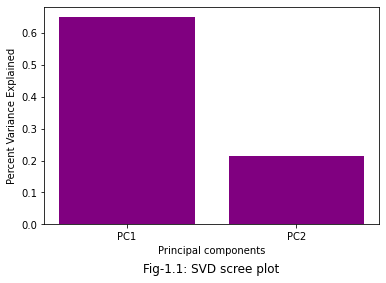

In [5]:
# plotting explained_variance_ratio for PC1 and PC2 using SVD
svd_labels = ['PC' + str(x) for x in range(1, 3)]
plt.bar(x=list(range(1,3)), 
        height=var_explained_svd[0:2],
        tick_label = svd_labels, 
        color="purple")

plt.xlabel('Principal components')
plt.ylabel('Percent Variance Explained')
plt.title('Fig-1.1: SVD scree plot',  y = -0.25)
plt.show()
#SVD part end-----------------------------------------------------------

In [6]:
#Sklearn PCA part start-----------------------------------------------------------

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
var_explained_pca = np.round(pca.explained_variance_ratio_, 
                             decimals=3)
var_explained_pca

array([0.648, 0.214])

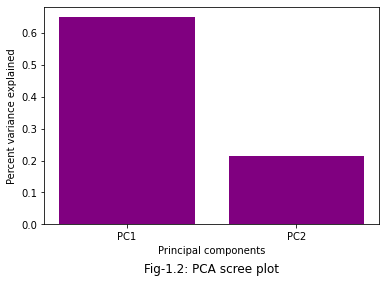

In [7]:
# plotting explained_variance_ratio for PC1 and PC2 using Sklearn PCA
pca_labels = ['PC' + str(x) for x in range(1, len(var_explained_pca)+1)]
plt.bar(x=range(1, len(var_explained_pca)+1), 
        height=var_explained_pca, 
        tick_label = pca_labels, 
        color="purple")
plt.ylabel('Percent variance explained')
plt.xlabel('Principal components')
plt.title('Fig-1.2: PCA scree plot',  y = -0.25)
plt.show()
#Sklearn PCA part end-----------------------------------------------------------

Here Fig-1.1 contains the value of explained variance ratio from SVD and Fig-1.2 contains the value from Sklearn PCA version of code. From Fig-1.1 and Fig-1.2 we can see that Percent variance explained value for PC1 and PC2 are exactly same for SVD and Sklearn PCA version. 

## b)

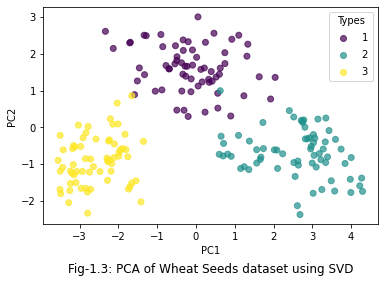

In [8]:
# plotting first two PC data using SVD

# flip eigenvectors' sign to enforce deterministic output
U, V = svd_flip(U, V)

# calculating first 2 PC from SVD
pc1 = U[:,0]*S[0]
pc2 = U[:,1]*S[1]
x_pca_from_svd = np.array([pc1, pc2])

types = df.Type
points = plt.scatter(x_pca_from_svd[0], 
                     x_pca_from_svd[1], 
                     c = types, 
                     alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Fig-1.3: PCA of Wheat Seeds dataset using SVD",  y = -0.25)
plt.legend(*points.legend_elements(), title="Types")
plt.show()

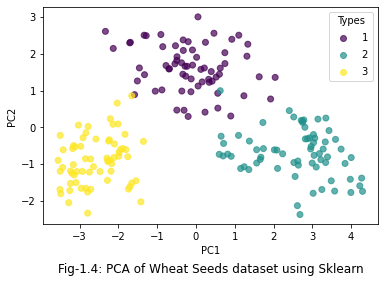

In [9]:
# plotting first two PC data using Sklearn PCA
types = df.Type
points = plt.scatter(x_pca[:,0], 
                     x_pca[:,1], 
                     c = types, 
                     alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Fig-1.4: PCA of Wheat Seeds dataset using Sklearn",  y = -0.25)
plt.legend(*points.legend_elements(), title="Types")
plt.show()

Fig-1.3 showing data from SVD version and Fig-1.4 showing Sklearn version of Principal Componant Analysis. During SVD implementation the values of Principal components were negative, as a result the Figure was looked like fliped. From stackoverflow a solution was taken to resolve this problem. From Sklearn the svd_flip was used. After using svd_flip everything looks perfect. From the Fig-1.3 and Fig-1.4 that can be seen clearly that Sklearn PCA and SVD both version of data are same. They reduced the dimentation of data perfectly.

## c)

### The importance of PCA in the “curse of dimensionality” problem:
'curse of dimensionality' is a major problem in data mining in large data sets with many potential predictor variables. This expression describe the increasing difficulty in training a model when more predictor variables are added to it. In other words, the error increases with the increase in the number of features. Furthermore, because of high dimentation the algorithms are harder to design.

Principal component analysis (PCA) can solve this problem. PCA is a technique for reducing the large dimensionality of datasets to a smaller one that still contain the most important information from the large set. So without lossing much information we get the lower dimensional data, lower dimensional data is make the computations easy and faster.

### Task -2 Clustering
## a)

In [58]:
import pandas as pd
import numpy as np

from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score

# import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#read data(dataset1) form csv file using pandas and store into df1
df1 = pd.read_csv (r'dataset1_noCluster7.csv')

#scaling data
scaler = MinMaxScaler()
df1['Y'] = scaler.fit_transform(df1[["Y"]])
df1['X'] = scaler.fit_transform(df1[["X"]])
df1.head()

,X,Y,label
0,0.367470,0.981618,2
1,0.347892,0.941176,2
2,0.334337,0.970588,2
3,0.325301,0.987132,2
4,0.313253,0.959559,2


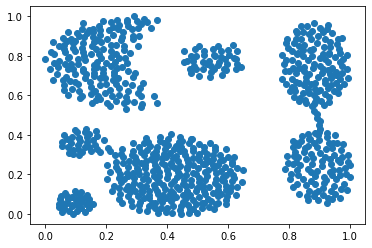

In [60]:
#plot data(dataset1) using scatter plot
plt.scatter(df1['X'], df1['Y'])
plt.show()

In [61]:
#read data(dataset2) form csv file using pandas and store into df2
df2 = pd.read_csv (r'dataset2_noCluster6.csv')
#scaling data
scaler = MinMaxScaler()
df2['Y'] = scaler.fit_transform(df2[["Y"]])
df2['X'] = scaler.fit_transform(df2[["X"]])
df2.head()

,X,Y,label
0,0.548252,0.964706,1
1,0.633566,0.964706,1
2,0.682517,0.902941,1
3,0.574825,0.888235,1
4,0.636364,0.835294,1


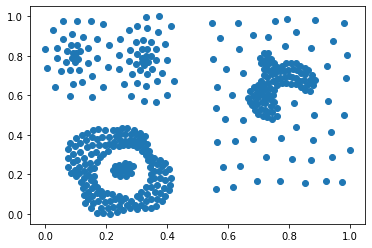

In [62]:
#plot data(dataset2) using scatter plot
plt.scatter(df2['X'], df2['Y'])
plt.show()

In [63]:
#read data(dataset3) form csv file using pandas and store into df3
df3 = pd.read_csv (r'dataset3_noCluster2.csv')
#scaling data
scaler = MinMaxScaler()
df3['Y'] = scaler.fit_transform(df3[["Y"]])
df3['X'] = scaler.fit_transform(df3[["X"]])
df3.head()

,X,Y,C
0,0.462567,0.827002,1
1,0.417728,0.287905,2
2,0.372799,0.368506,2
3,0.171456,0.795269,1
4,0.943495,0.267225,2


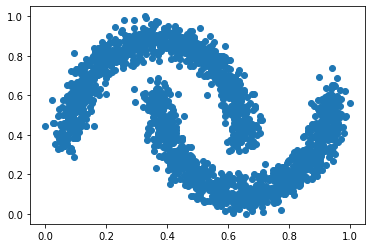

In [64]:
#plot data(dataset3) using scatter plot
plt.scatter(df3['X'], df3['Y'])
plt.show()

In [65]:
#read data(dataset4) form csv file using pandas and store into df4
df4 = pd.read_csv (r'dataset4_noCluster2.csv')
#scaling data
scaler = MinMaxScaler()
df4['Y'] = scaler.fit_transform(df4[["Y"]])
df4['X'] = scaler.fit_transform(df4[["X"]])
df4.head()

,X,Y,C
0,0.787066,0.443775,1
1,0.747541,0.356564,1
2,0.618671,0.356595,1
3,0.893269,0.350083,1
4,0.747625,0.670901,1


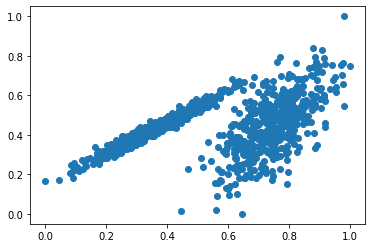

In [66]:
#plot data(dataset3) using scatter plot
plt.scatter(df4['X'], df4['Y'])
plt.show()

## b)

In [337]:
#defining helper functions here=================================================================================================

#plot function------------------------------------------------------------------------------------------------------------------
def plot_data(df, title):
    
    #get unique clusters labels from dataframe's cluster column, we stored cluster values when we run the algorithoms
    clusters_unique = df.cluster.unique()
    clusters_unique.sort()
    
    #declare a dictionary to dynamically keeps different clusters data
    c_dic = {}
    for index in clusters_unique:
        
        #update dictionary with different cluster's data
        #sample dictionary data shape
        #ex: c_dic = {'c1': data, 'c2': data, ....} 
        c_dic['c'+str(index)] = df[df.cluster==index]
        #plot different cluster's data
        plt.scatter(c_dic['c'+str(index)].X, 
                    c_dic['c'+str(index)].Y,
                    alpha=0.7,
                    label= "noise" if index == -1 else 'c'+str(index))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()



#calculate score for cluster function-------------------------------------------------------------------------------------------
def getScore(df, y_pred):
    
    true_labels = []
    
    #reading true labels from dataFrame that already given, 
    #2 dataset contains true labels in 'label' column and other 2 contains in 'C' column
    if 'label' in df.columns:
        true_labels = df['label']
    else:
        true_labels = df['C']
    
    #get silhouette score
    sltt_score = silhouette_score(df[['X','Y']],
                                  y_pred)
    
    #get Normalized mutual info score
    nmi_score = normalized_mutual_info_score(true_labels, 
                                             y_pred)
    
    #print("Silhouette score--------------------->{}".format(sltt_score))
    #print("Normalized mutual info score--------->{}".format(nmi_score))
    
    return [sltt_score, nmi_score]


    
#K-Means function---------------------------------------------------------------------------------------------------------------
def k_means(df=df1):
    
    #finding optimal K value using 'silhouette scores' and 'normalized mutual info score'--------------------------
    all_scores = []
    rng = range(2,11)
    optimal_clusters = 1
    max_score = 0
    for k in rng:
        #apply k-means form sklearn for k =  2,3,4,5....10
        km = KMeans(n_clusters=k)
        y_pred = km.fit_predict(df[['X','Y']])

        #get silhouette and Normalized mutual info score for different clusters, ex: 2,3,4,5....10
        single_scores = getScore(df, y_pred)
        all_scores.append(single_scores)
        
        #if max score found from silhouette scores then we will update it in max_score
        if single_scores[0] > max_score:
            max_score = single_scores[0]
            optimal_clusters = k
        
        #if max score found from normalized mutual info score then we will update it in max_score
        if single_scores[1] > max_score:
            max_score = single_scores[1]
            optimal_clusters = k
            
    all_scores = np.array(all_scores)
    
    #Plot scores curves, that score close to 1 is better. 
    #we take heighst score's corrosponding cluster number value form x-axis as our optimal K value
    plt.ylim(0, 1)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Scores')
    plt.title('select optimal k value from K-Means')
    plt.plot(rng, all_scores[:,0], linestyle='--', marker='o', color='g', label='silhouette scores')
    plt.plot(rng, all_scores[:,1], linestyle='--', marker='o', color='b', label='normalized mutual info score')
    plt.axvline(x=optimal_clusters, color='r', linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()
    print("Optimal K value for this dataset(K-Means): {}".format(optimal_clusters))
    
    
    #apply k-means form sklearn.cluster with optimal k value we have calculated------------------------------------
    km = KMeans(n_clusters=optimal_clusters)
    y_pred = km.fit_predict(df[['X','Y']])
    
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
    # print(km.cluster_centers_)
    
    #get silhouette and Normalized mutual info score
    score_list = getScore(df, y_pred)
    score_list.append('k-means')
    
#     #Elbow Plot to visuallize the errors for different k, and select optimal k value from plot
#     sse = []
#     k_rng = range(1,10)
#     for k in k_rng:
#         km1 = KMeans(n_clusters=k)
#         km1.fit(df1[['X','Y']])
#         sse.append(km1.inertia_)

#     plt.xlabel('K')
#     plt.ylabel('Sum of squared error')
#     plt.title('Elbow Plot, select best k value from plot')
#     plt.plot(k_rng,sse)
#     plt.show()
    
    
    #call custom plot function to plot clustered data--------------------------------------------------------------
    plot_data(df, 'K-means Clustering')
    
    return score_list

    
#DBSCAN function----------------------------------------------------------------------------------------------------------------
def db_scan(eps=0.5, min_samples=5, df=df1):
    
    #finding best epsilon value for dbscan algorithm---------------------------------------------------------------
    nneigh = NearestNeighbors(n_neighbors=2)
    nbrs = nneigh.fit(df[['X','Y']])
    distances, indices = nbrs.kneighbors(df[['X','Y']])
    
    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.show()
    
    
    #apply DBSCAN form sklearn.cluster------------------------------------------------------------------------------
    dbscan = DBSCAN(eps=eps, 
                    min_samples=min_samples, 
                    n_jobs=-1)
    y_pred = dbscan.fit_predict(df[['X','Y']])
    
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
    
    #get silhouette and Normalized mutual info score
    score_list = getScore(df, y_pred)
    score_list.append('DBSCAN')
    
    #call custom plot function to plot clustered data
    plot_data(df, 'DBSCAN Clustering')
    
    return score_list
    

#Expectation maximizatin with gussian function----------------------------------------------------------------------------------
def expectation_maximization(covariance_type='tied', n_init=10, init_params='random', df=df1):
    
    #finding optimal n_components value using 'silhouette scores' and 'normalized mutual info score'----------------
    all_scores = []
    rng = range(2,11)
    optimal_clusters = 1
    max_score = 0
    for k in rng:
        #apply BayesianGaussianMixture form sklearn for n_components =  2,3,4,5....10
        gmm = mixture.BayesianGaussianMixture(n_components=k,
                                              covariance_type=covariance_type,
                                              n_init=n_init,
                                              max_iter=120,
                                              init_params=init_params)
        y_pred = gmm.fit_predict(df[['X','Y']])

        #get silhouette and Normalized mutual info score for different clusters, ex: 2,3,4,5....10
        single_scores = getScore(df, y_pred)
        all_scores.append(single_scores)
        
        #if max score found from silhouette scores then we will update it in max_score
        if single_scores[0] > max_score:
            max_score = single_scores[0]
            optimal_clusters = k
        
        #if max score found from normalized mutual info score then we will update it in max_score
        if single_scores[1] > max_score:
            max_score = single_scores[1]
            optimal_clusters = k
            
    all_scores = np.array(all_scores)
    
    #Plot scores curves, that score close to 1 is better. 
    #we take heighst score's corrosponding cluster number value form x-axis as our optimal cluster value
    plt.ylim(0, 1)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Scores')
    plt.title('select optimal n_components value from EM')
    plt.plot(rng, all_scores[:,0], linestyle='--', marker='o', color='g', label='silhouette scores')
    plt.plot(rng, all_scores[:,1], linestyle='--', marker='o', color='b', label='normalized mutual info score')
    plt.axvline(x=optimal_clusters, color='r', linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()
    print("Optimal n_components value for this dataset(EM): {}".format(optimal_clusters))
    
    
    #apply BayesianGaussianMixture form sklearn with optimal n_components value we have calculated-----------------
    gmm = mixture.BayesianGaussianMixture(n_components=optimal_clusters,
                                          covariance_type=covariance_type,
                                          n_init=n_init,
                                          max_iter=120,
                                          init_params=init_params)
    y_pred = gmm.fit_predict(df[['X','Y']])
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
    
    #get silhouette and adjusted score
    score_list = getScore(df, y_pred)
    score_list.append('Expectation maximization')
    
    #call custom plot function to plot clustered data
    plot_data(df, 'Expectation maximization Clustering')
    
    return score_list



#Average Link function----------------------------------------------------------------------------------------------------------
def average_link(n_clusters=2,linkage="ward", df=df1):
    
    #finding optimal k value using 'silhouette scores' and 'normalized mutual info score'--------------------------
    all_scores = []
    rng = range(2,11)
    optimal_clusters = 1
    max_score = 0
    for k in rng:
       #apply AgglomerativeClustering form sklearn for n_clusters=2,3,4,5....10
        ac = AgglomerativeClustering(n_clusters=k, 
                                     linkage=linkage)
        y_pred = ac.fit_predict(df[['X','Y']])

        #get silhouette and Normalized mutual info score for different clusters, ex: 2,3,4,5....10
        single_scores = getScore(df, y_pred)
        all_scores.append(single_scores)
        
        #if max score found from silhouette scores then we will update it in max_score
        if single_scores[0] > max_score:
            max_score = single_scores[0]
            optimal_clusters = k
        
        #if max score found from normalized mutual info score then we will update it in max_score
        if single_scores[1] > max_score:
            max_score = single_scores[1]
            optimal_clusters = k
            
    all_scores = np.array(all_scores)
    
    #Plot scores curves, that score close to 1 is better. 
    #we take heighst score's corrosponding cluster number value form x-axis as our optimal cluster value
    plt.ylim(0, 1)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Scores')
    plt.title('select optimal n_clusters value from Average Link')
    plt.plot(rng, all_scores[:,0], linestyle='--', marker='o', color='g', label='silhouette scores')
    plt.plot(rng, all_scores[:,1], linestyle='--', marker='o', color='b', label='normalized mutual info score')
    plt.axvline(x=optimal_clusters, color='r', linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()
    print("Optimal n_clusters value for this dataset(Average Link): {}".format(optimal_clusters))
    
    
    #apply Agglomerative clustering form sklearn.cluster-----------------------------------------------------------
    #linkage="average"/"ward"/"complete"/"single"
    ac = AgglomerativeClustering(n_clusters=optimal_clusters, 
                                 linkage=linkage)
    y_pred = ac.fit_predict(df[['X','Y']])
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
   
    #get silhouette and Normalized mutual info score
    score_list = getScore(df, y_pred)
    score_list.append('Average link')
    
    #call custom plot function to plot clustered data
    plot_data(df, 'Average link Clustering')
    
    return score_list

The optimal epsilon value has been choosen form the k-distance Graph. We took that epsilon value when the epsilon value increasing suddendly and never decrease.

Dataset-1:


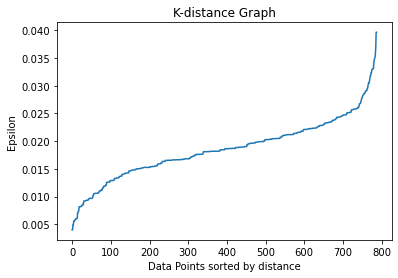

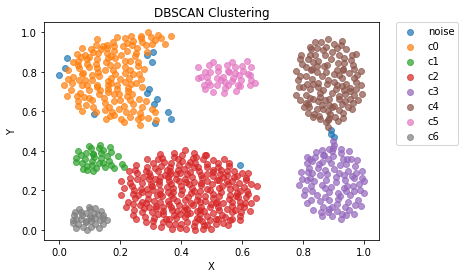

Dataset-2:


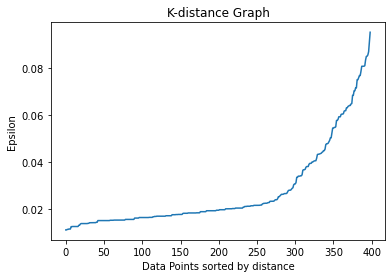

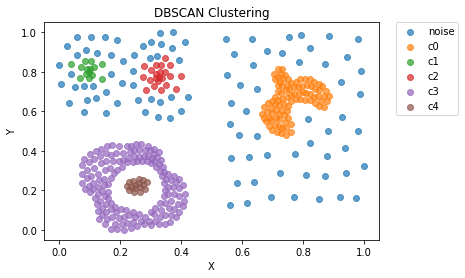

Dataset-3:


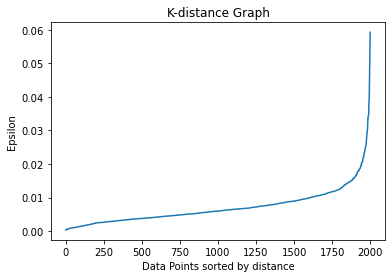

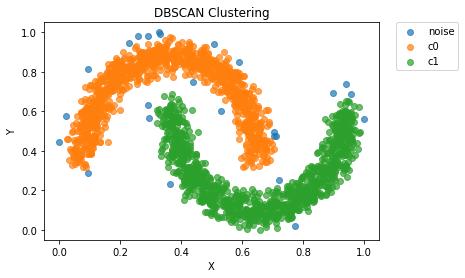

Dataset-4:


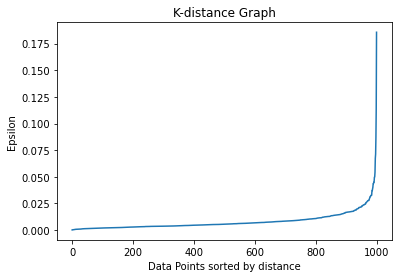

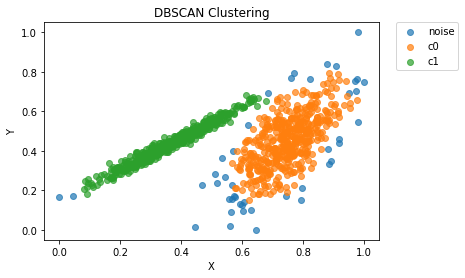

[0.48521514011086214, 0.8591633760766444, 'DBSCAN']

In [338]:
print("The optimal epsilon value has been choosen form the k-distance Graph. We took that epsilon value when the epsilon value increasing suddendly and never decrease.\n")
# applying DBSCAN clustering algorithm for dataset1
print("Dataset-1:")
db_scan(eps=0.036, min_samples=5, df=df1)

print("Dataset-2:")
# applying DBSCAN clustering algorithm for dataset2
db_scan(eps=0.04, min_samples=5, df=df2)

print("Dataset-3:")
# applying DBSCAN clustering algorithm for dataset3
db_scan(eps=0.03, min_samples=5, df=df3)

print("Dataset-4:")
# applying DBSCAN clustering algorithm for dataset4
db_scan(eps=0.035, min_samples=5, df=df4)


#### Used cluster: DBSCAN
Some of the given datasets contain non-linear shapes and some of them contain noise data points. To cluster them, I tried different cluster algorithms like DBSCAN, KMeans, Expectation-Maximization (EM), and Average Link. In average DBSCAN performs better but in different dataset different algorithm gives best output.

#### Parameters chosen: 
I used three parameters from DBSCAN. They are:
*eps*, *min_samples*, *n_jobs*.

#### Reasons to choose these parameters:
*eps*: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter that needs to be properly selected for datasets and distance functions.
DBSCAN will cluster the same dataset differently depending on this parameter. To select the best value for this parameter I plot the K-distance graph using the **NearestNeighbors** library. From this graph, we can see when is the data density is increasing. All we have to do to pick the best value for epsilon is to pick an epsilon value from where the epsilon is increasing instantly. In our case for the first dataset, epsilon = 0.036 and for dataset2, 3, 4 are 0.04, 0.03, 0.035.

*min_samples*: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself. It is also important for DBSCAN clustering. Generally, MinPts should be greater than or equal to the dimensionality of the dataset. Our data set is two-dimensional. So, I have tested with 2 and greater values. At last, I found using 5 gives the best clustering result.

*n_jobs*: I used this perameter to execute program faster in parallel. The value -1 means system will use all available processor to execute the program parallelly.


## c)

Dataset-1=========================================================
K-means===========================================================


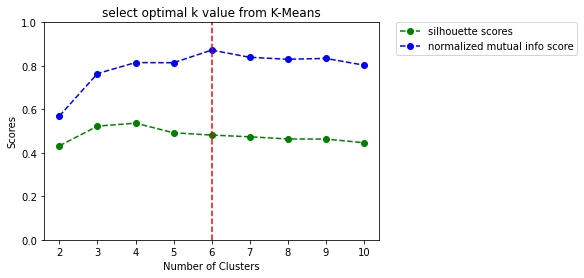

Optimal K value for this dataset(K-Means): 6


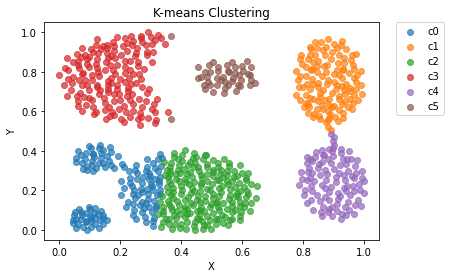


DBSCAN==========================================================


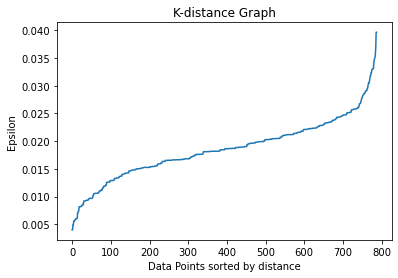

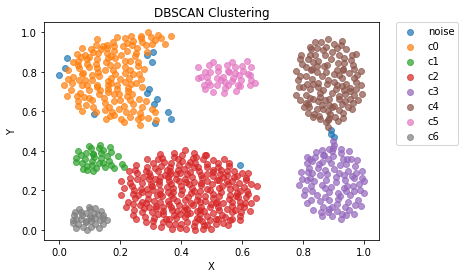


Expectation Maximization========================================


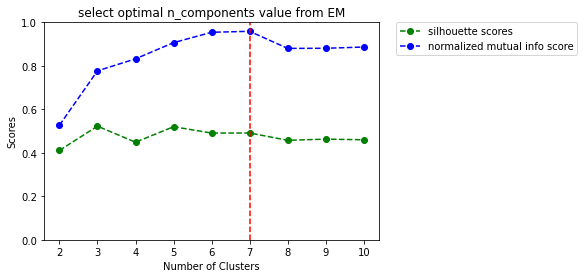

Optimal n_components value for this dataset(EM): 7


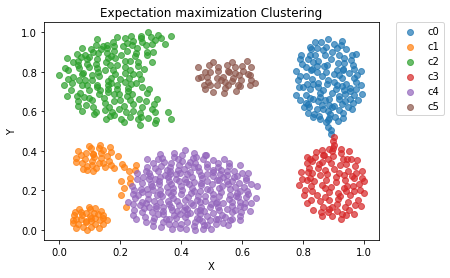


Average Link=====================================================


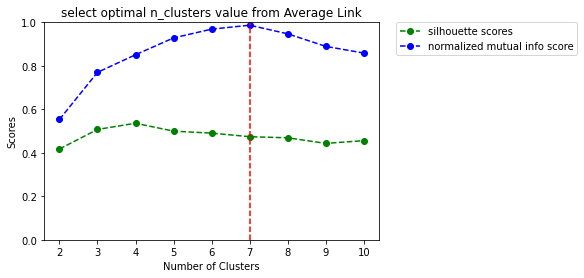

Optimal n_clusters value for this dataset(Average Link): 7


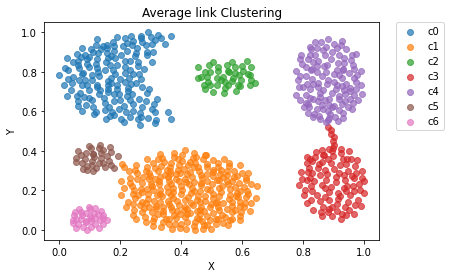

In [342]:
#using sklearn.metrics compare all the algorithm results
#Dataset-1 ------------------------------------------------------------------------------------------------------------------

#k-means
print("Dataset-1=========================================================")
print("K-means===========================================================")
km_score_df1 = k_means(df=df1)

#DBSCAN
print("\nDBSCAN==========================================================")
dbscan_score_df1 = db_scan(eps=0.036, 
                           min_samples=5, 
                           df=df1)

#expectation maximization
print("\nExpectation Maximization========================================")
em_score_df1 = expectation_maximization(covariance_type='full', 
                                        n_init=10, 
                                        init_params='kmeans', 
                                        df=df1)

#average link
print("\nAverage Link=====================================================")
al_score_df1 = average_link(linkage="average", 
                            df=df1)

In [404]:
#Dataset-1 scores
print("Scores for Dataset-1:")
score_list_df1 = [km_score_df1, dbscan_score_df1, em_score_df1, al_score_df1]

#Create the pandas DataFrame
scores_df1 = pd.DataFrame(score_list_df1, columns = ['Silhouette score', 'Normalized mutual info score', 'Algorithm'])

#find max score algorithm's name and append it in last row
best = scores_df1["Algorithm"].iloc[scores_df1['Normalized mutual info score'].idxmax()]
scores_df1.loc[len(scores_df1.index)] = ['Best clustering algorithm', "------->", best]
scores_df1
# print("Best clustering algorithm for dataset-1: {}".format(scores_df1["Algorithm"].iloc[scores_df1['Normalized mutual info score'].idxmax()]))


Scores for Dataset-1:


,Silhouette score,Normalized mutual info score,Algorithm
0,0.481739,0.875642,k-means
1,0.458522,0.963196,DBSCAN
2,0.490638,0.948219,Expectation maximization
3,0.474198,0.986939,Average link
4,Best clustering algorithm,------->,Average link


Dataset-2=========================================================
K-means===========================================================


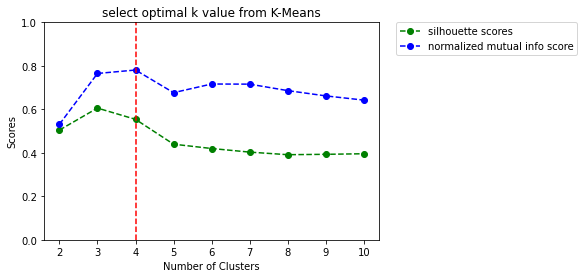

Optimal K value for this dataset(K-Means): 4


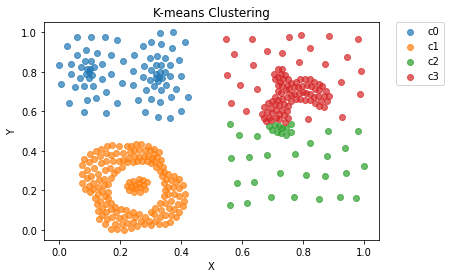


DBSCAN==========================================================


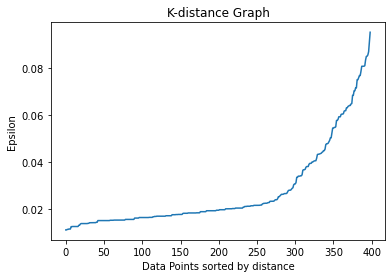

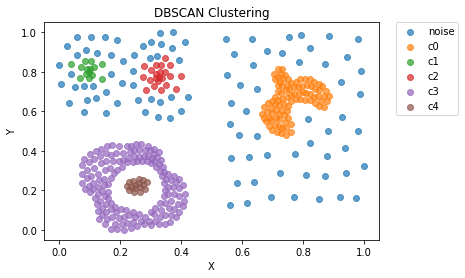


Expectation Maximization========================================


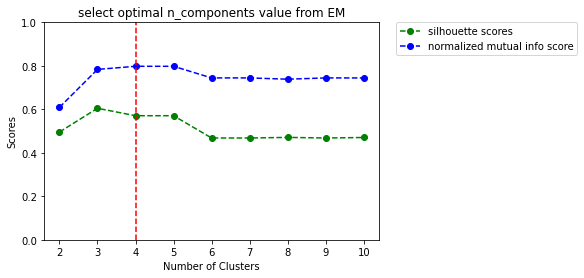

Optimal n_components value for this dataset(EM): 4


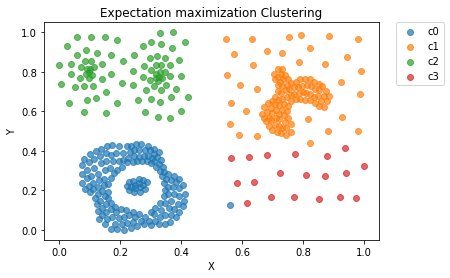


Average Link=====================================================


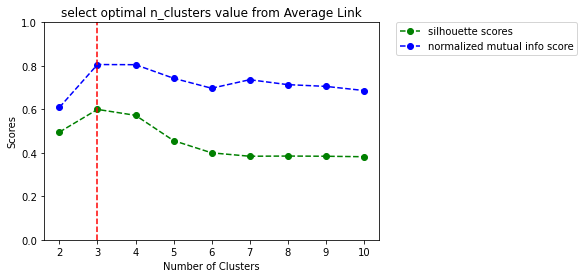

Optimal n_clusters value for this dataset(Average Link): 3


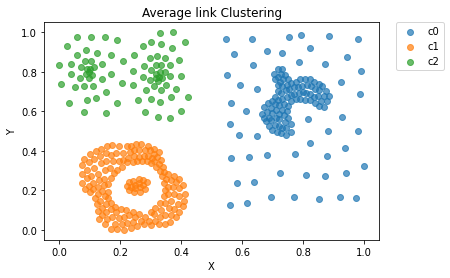

In [346]:
#Dataset-2 ---------------------------------------------------------------------------------------------------------------------
#k-means
print("Dataset-2=========================================================")
print("K-means===========================================================")
km_score_df2 = k_means(df=df2)

#DBSCAN
print("\nDBSCAN==========================================================")
dbscan_score_df2 = db_scan(eps=0.04, 
                           min_samples=5, 
                           df=df2)

#expectation maximization
print("\nExpectation Maximization========================================")
em_score_df2 = expectation_maximization(covariance_type='spherical', 
                                        n_init=10,  
                                        init_params='kmeans', 
                                        df=df2)

#average link
print("\nAverage Link=====================================================")
al_score_df2 = average_link(linkage="ward",
                            df=df2)


In [408]:
#Dataset-2 scores
print("Scores for Dataset-2:")
score_list_df2 = [km_score_df2, dbscan_score_df2, em_score_df2, al_score_df2]

#Create the pandas DataFrame
scores_df2 = pd.DataFrame(score_list_df2, columns = ['Silhouette score', 'Normalized mutual info score', 'Algorithm'])

#find max score algorithm's name and append it in last row
best = scores_df2["Algorithm"].iloc[scores_df2['Normalized mutual info score'].idxmax()]
scores_df2.loc[len(scores_df2.index)] = ['Best clustering algorithm', "------->", best]
scores_df2

Scores for Dataset-2:


,Silhouette score,Normalized mutual info score,Algorithm
0,0.548179,0.77117,k-means
1,0.032213,0.870569,DBSCAN
2,0.570693,0.797949,Expectation maximization
3,0.599658,0.806069,Average link
4,Best clustering algorithm,------->,DBSCAN


Dataset-3=========================================================
K-means===========================================================


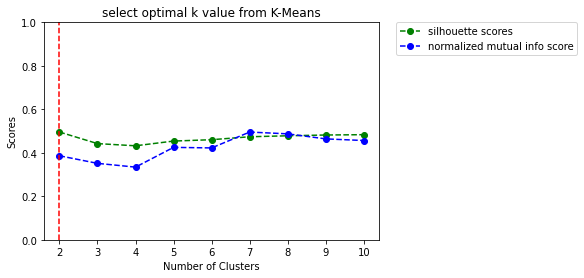

Optimal K value for this dataset(K-Means): 2


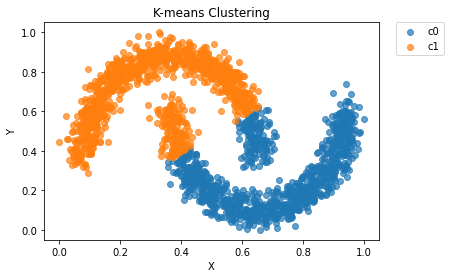


DBSCAN==========================================================


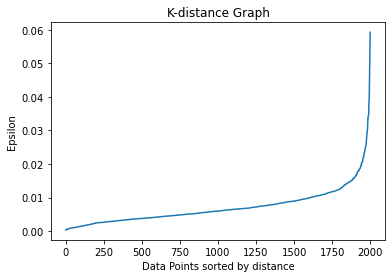

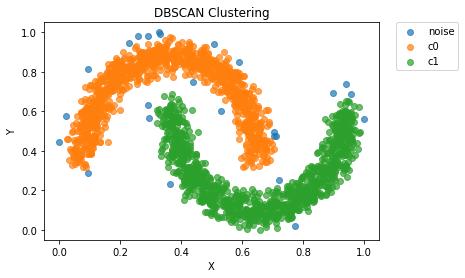


Expectation Maximization========================================


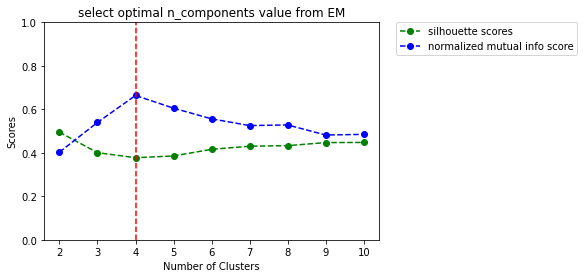

Optimal n_components value for this dataset(EM): 4


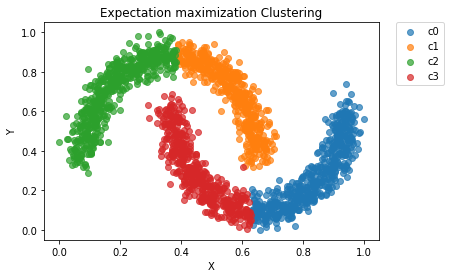


Average Link=====================================================


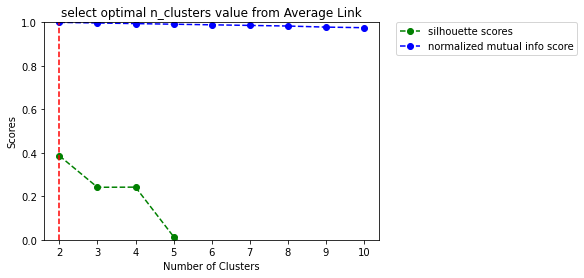

Optimal n_clusters value for this dataset(Average Link): 2


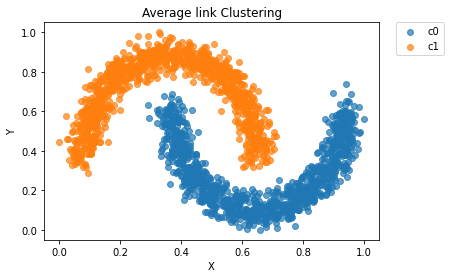

In [348]:
#Dataset-3 ---------------------------------------------------------------------------------------------------------------------
#k-means
print("Dataset-3=========================================================")
print("K-means===========================================================")
km_score_df3 = k_means(df=df3)

#DBSCAN
print("\nDBSCAN==========================================================")
dbscan_score_df3 = db_scan(eps=0.03, 
                           min_samples=5, 
                           df=df3)

#expectation maximization
print("\nExpectation Maximization========================================")
em_score_df3 = expectation_maximization(covariance_type='full', 
                                        n_init=10,    
                                        init_params='kmeans', 
                                        df=df3)

#average link
print("\nAverage Link=====================================================")
al_score_df3 = average_link(linkage="single",
                            df=df3)


In [409]:
#Dataset-3 scores
print("Scores for Dataset-3:")
score_list_df3 = [km_score_df3, dbscan_score_df3, em_score_df3, al_score_df3]

#Create the pandas DataFrame
scores_df3 = pd.DataFrame(score_list_df3, columns = ['Silhouette score', 'Normalized mutual info score', 'Algorithm'])

#find max score algorithm's name and append it in last row
best = scores_df3["Algorithm"].iloc[scores_df3['Normalized mutual info score'].idxmax()]
scores_df3.loc[len(scores_df3.index)] = ['Best clustering algorithm', "------->", best]
scores_df3

Scores for Dataset-3:


,Silhouette score,Normalized mutual info score,Algorithm
0,0.495734,0.386419,k-means
1,0.285016,0.948186,DBSCAN
2,0.377447,0.663743,Expectation maximization
3,0.38616,1.0,Average link
4,Best clustering algorithm,------->,Average link


Dataset-4=========================================================
K-means===========================================================


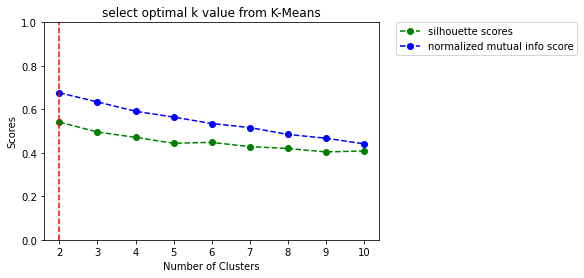

Optimal K value for this dataset(K-Means): 2


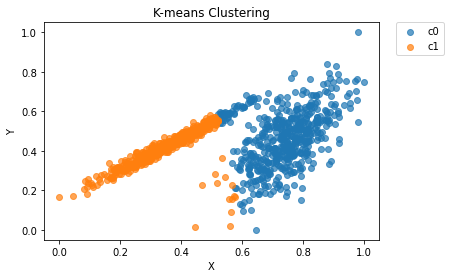


DBSCAN==========================================================


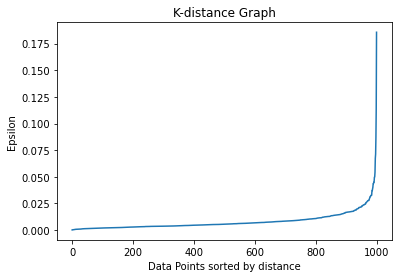

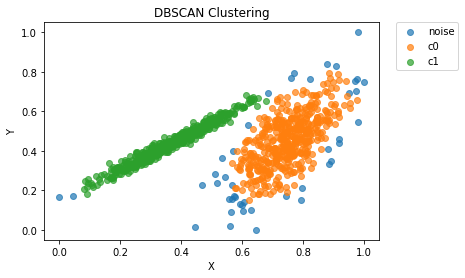


Expectation Maximization========================================


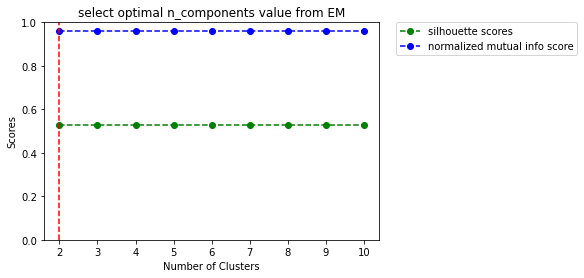

Optimal n_components value for this dataset(EM): 2


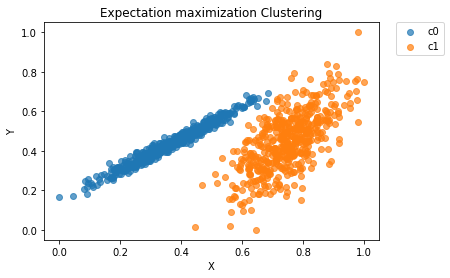


Average Link=====================================================


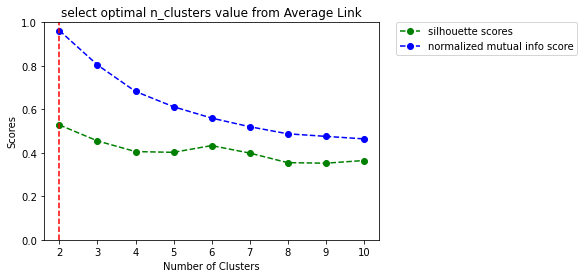

Optimal n_clusters value for this dataset(Average Link): 2


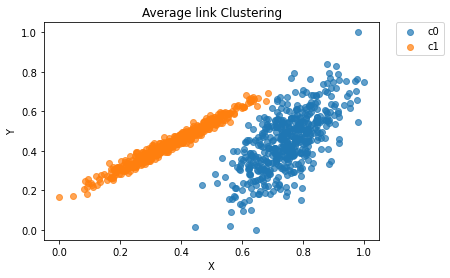

In [350]:
#Dataset-4 ---------------------------------------------------------------------------------------------------------------------
#k-means
print("Dataset-4=========================================================")
print("K-means===========================================================")
km_score_df4 = k_means(df=df4)

#DBSCAN
print("\nDBSCAN==========================================================")
dbscan_score_df4 = db_scan(eps=0.035, 
                           min_samples=5, 
                           df=df4)

#expectation maximization
print("\nExpectation Maximization========================================")
em_score_df4 = expectation_maximization(covariance_type='full', 
                                        n_init=10, 
                                        init_params='kmeans', 
                                        df=df4)

#average link
print("\nAverage Link=====================================================")
al_score_df4 = average_link(linkage="ward",
                            df=df4)


In [410]:
#Dataset-4 scores
print("Scores for Dataset-4:")
score_list_df4 = [km_score_df4, dbscan_score_df4, em_score_df4, al_score_df4]

#Create the pandas DataFrame
scores_df4 = pd.DataFrame(score_list_df4, columns = ['Silhouette score', 'Normalized mutual info score', 'Algorithm'])

#find max score algorithm's name and append it in last row
best = scores_df4["Algorithm"].iloc[scores_df4['Normalized mutual info score'].idxmax()]
scores_df4.loc[len(scores_df4.index)] = ['Best clustering algorithm', "------->", best]
scores_df4

Scores for Dataset-4:


,Silhouette score,Normalized mutual info score,Algorithm
0,0.54144,0.675953,k-means
1,0.485215,0.859163,DBSCAN
2,0.528183,0.962378,Expectation maximization
3,0.528183,0.962378,Average link
4,Best clustering algorithm,------->,Expectation maximization


## d)

### Results discussion:
k-means, DBSCAN, Expectation maximization, and Average link algorithms were applied in all the four given data sets. After that, for evolution, the Sillhouette score and Normalized mutual info score had been calculated.

With the silhouette coefficient, it is hard to identify which clustering algorithm performs better because we can see from graphs that some cluster algorithms silhouette coefficient is high but another algorithm appears to find more natural clusters according to the shape of the data. This suggests that we need a better method to compare the performance of these clustering algorithms. Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. The Normalized mutual info (NMI) had been used in this case. Unlike the silhouette coefficient, the NMI uses true cluster assignments to measure the similarity between true and predicted labels. 

The NMI output values range between 0 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

**Dataset-1:**
For dataset-1 we can see from the scores table the silhouette score of 'EM' is largest but 'DBSCAN' and 'average link' cluster algorithm gives more natural clusters. If we see the Normalized mutual info score for the dataset-1, the 'average link' is more accurate than others. It's Normalized mutual info score is around 0.98 which means the predicted lebels are almost the same as the true labels and it is giving more natural clusters. DBSCAN is also performed well in this case.

**Dataset-2:**
Dataset-2 contains many noise points. DBSCAN clustering algorithm performs better with noisy data than others. We can see the Normalized mutual info score of DBSCAN is the largest which is 0.8776.

**Dataset-3:**
For Dataset-3, the performance of k-means is really bad but on the other hand, the Average link is perfect. Its Normalized mutual info score is 1 which means our predicted labels and true labels are exactly the same. Anyways DBSCAN also performed well. DBSCAN score is 0.9751.

**Dataset-4:**
In Dataset-4 the Normalized mutual info score of 'Expectation maximization' and 'Average link' is the same and the highest(0.96). DBSCAN's performance is also good but here k-means's score is low. K-means couldn't cluster the dataset properly.

Overall in average DBSCAN performs really well for these 4 datasets. Sometimes it didn't give exact cluster but most of the time it give more natural cluster than others. If we want to talk about individual performance then we can say
- for dataset-1 best choice is'Average Link' clustering algorithm 
- for dataset-2 best choice is 'DBSCAN' clustering algorithm
- for dataset-3 best choice is'Average Link' clustering algorithm
- for dataset-4 best choice is 'Expectation maximization' and 'Average Link" both clustering algorithm.



### Task -3 Apriori Algorithm for Recommender Systems
## a)

In [1]:
import numpy as np
from collections import Counter
import json

from itertools import combinations
from collections import OrderedDict
# import sys

# from itertools import chain, combinations
# from collections import defaultdict
# from optparse import OptionParser

# from apyori import apriori

In [2]:
movie_list = []
movie_list_unique = []
#read data from text file
with open("movies.txt", "r") as m_id:
    for row in m_id:
        str_line = row.strip().split(';')
        movie_list.append(str_line)
        #separate unique movies
        for single_movie in str_line:
            if(single_movie not in movie_list_unique):
                movie_list_unique.append(single_movie)

print(len(movie_list))
movie_list

8892


[['Incredibles 2',
  'Avengers: Infinity War - Part I',
  'Avengers: Infinity War - Part II',
  'Deadpool 2'],
 ['Annihilation',
  'John Wick: Chapter 3 â€“ Parabellum',
  'Deadpool 2',
  'Incredibles 2',
  'Avengers: Infinity War - Part I',
  'Avengers: Infinity War - Part II',
  'Mission: Impossible - Fallout',
  'Spider-Man: Into the Spider-Verse'],
 ['Avengers: Infinity War - Part I', 'Bohemian Rhapsody'],
 ['Green Book', 'Incredibles 2', 'Isle of Dogs'],
 ['Bohemian Rhapsody',
  'Captain Marvel',
  'Avengers: Infinity War - Part I',
  'Spider-Man: Into the Spider-Verse'],
 ['Deadpool 2',
  'Incredibles 2',
  'Avengers: Infinity War - Part I',
  'Avengers: Infinity War - Part II',
  'Captain Marvel',
  'Solo: A Star Wars Story',
  'Spider-Man: Into the Spider-Verse'],
 ['Green Book', 'Venom', 'Spider-Man: Into the Spider-Verse', 'Deadpool 2'],
 ['Annihilation',
  'Roma',
  'Joker',
  'Deadpool 2',
  'Hereditary',
  'Avengers: Infinity War - Part I',
  'The Ballad of Buster Scruggs'

In [30]:
print(len(movie_list_unique))
movie_list_unique

50


['Incredibles 2',
 'Avengers: Infinity War - Part I',
 'Avengers: Infinity War - Part II',
 'Deadpool 2',
 'Annihilation',
 'John Wick: Chapter 3 â€“ Parabellum',
 'Mission: Impossible - Fallout',
 'Spider-Man: Into the Spider-Verse',
 'Bohemian Rhapsody',
 'Green Book',
 'Isle of Dogs',
 'Captain Marvel',
 'Solo: A Star Wars Story',
 'Venom',
 'Roma',
 'Joker',
 'Hereditary',
 'The Ballad of Buster Scruggs',
 'Sorry to Bother You',
 'Game Night',
 'Searching',
 'Upgrade',
 'Us',
 'Fantastic Beasts and Where to Find Them 2',
 'A Quiet Place',
 'Once Upon a Time in Hollywood',
 'Black Mirror: Bandersnatch',
 'Spider-Man: Far from Home',
 'Aquaman',
 'Jurassic World: Fallen Kingdom',
 'Ant-Man and the Wasp',
 'Free Solo',
 'Crazy Rich Asians',
 'BlacKkKlansman',
 'Ralph Breaks the Internet',
 'Eighth Grade',
 'Glass',
 'A Star Is Born',
 'Bird Box',
 'Love, Simon',
 'First Man',
 'Bad Times at the El Royale',
 'Shazam!',
 'Alita: Battle Angel',
 "Won't You Be My Neighbor?",
 'Red Sparrow

In [31]:
#function needs to apriori algorithm
# minimum_support = 0.05
# minimum_support = 444
# backet_list = [['a','b'],['a','c'],['c','d'],['a','d']]
# backet_list_unique = np.unique(backet_list)

# com_list = []
# for i in range(1,len(backet_list_unique)+1):
#     s_item = list(combinations(backet_list_unique,i))
#     com_list.extend(s_item)
# com_list

In [7]:
#Helper functions for apriori algorithm-----------------------------------------------------------------------------------------
# This function takes dic and minimum support as parameters and 
# eliminate a movie which has lower frequency than minimum support
def eliminate_minsup(dic, minsup):
    words = dic.keys()
    for word in list(words):
        if dic[word] < minsup:
            del dic[word]
    
    return dic


# Counting the movies in the first step
def count_first_freq(inputs, minsup):
    dic = dict()
    for line in inputs:
        for word in line:
            if word not in dic.keys():
                dic[word] = 1
            else:
                dic[word] += 1
    
    return eliminate_minsup(dic, minsup)


# Sort movie dictionary by frequency
def sorting(dic):
    sorted_dic = dict()
    alpha_sort = sorted(list(dic.keys()))
    num_sort = sorted(alpha_sort, key=dic.get, reverse=True)
    for i in num_sort:
        sorted_dic[i] = dic[i]
    
    return sorted_dic


In [8]:
#calculating movies supports--------------------------------------------------------------------------------------------------- 
# minimum_support = 0.05
minimum_support = 444

single_movie_supports = count_first_freq(movie_list, minimum_support)
print(len(single_movie_supports))

#sorting the dictionary decending in order
single_movie_supports = sorting(single_movie_supports)   
print(single_movie_supports)

# save data into text file
f = open("oneItems.txt", "w")
for key, value in single_movie_supports.items(): 
        f.write('%s:%s\n' % (value, key))
f.close()

50
{'Avengers: Infinity War - Part I': 5294, 'Deadpool 2': 4003, 'Spider-Man: Into the Spider-Verse': 2976, 'Avengers: Infinity War - Part II': 2771, 'Incredibles 2': 2729, 'A Quiet Place': 2202, 'Bohemian Rhapsody': 2052, 'Annihilation': 1916, 'Isle of Dogs': 1898, 'Ant-Man and the Wasp': 1826, 'Green Book': 1812, 'Mission: Impossible - Fallout': 1525, 'Solo: A Star Wars Story': 1465, 'Game Night': 1317, 'Hereditary': 1278, 'Captain Marvel': 1263, 'BlacKkKlansman': 1215, 'Spider-Man: Far from Home': 1130, 'Venom': 1093, 'Upgrade': 1025, 'A Star Is Born': 1013, 'Aquaman': 943, 'The Ballad of Buster Scruggs': 920, 'Jurassic World: Fallen Kingdom': 887, 'Fantastic Beasts and Where to Find Them 2': 874, 'Bird Box': 873, 'Once Upon a Time in Hollywood': 859, "Ocean's 8": 850, 'Searching': 812, 'Roma': 801, 'Joker': 792, 'Black Mirror: Bandersnatch': 791, 'Us': 765, 'Sorry to Bother You': 761, 'Tomb Raider': 741, 'John Wick: Chapter 3 â€“ Parabellum': 731, 'Free Solo': 709, 'Crazy Rich Asia

## b)

In [21]:
# Helper functions for apriori algorithm----------------------------------------------------------------------------------------
# Sort dictionary by lexicographical order
def tuple_sort(dic, count):
    sorted_dic = dict()
    for key in dic.keys():
        key_sorted = sorted(key)
        sorted_dic[tuple(key_sorted)] = dic[key]
    
    return sorted_dic


# Self join k-itemset to create k+1 itemset
def self_join(sets, length):
    lst = []
    if length == 2:
        return list(combinations(sets, length))
    else:
        for st in sets:
            for item in st:
                if item not in lst:
                    lst.append(item)
                    
        return list(combinations(lst, length))

    
# Pruneing process to delete all enrties form Ck where not all possible subsets are presentt in Lk-1
def pruneing(candidate, previous_set, length, inputs, minsup):
    dic = dict()
    if length == 2:
        for candid in candidate:
            dic[candid] = 0
    else:
        for cand_item in candidate:
            subsets = combinations(list(cand_item), length - 1)
            count = 0
            subsets = list(subsets)
            for subset in subsets:
                if set(subset).issubset(set(previous_set)):
                    break
                count += 1
            if count == len((subsets)):
                dic[cand_item] = 0
                
    for key in dic.keys():
        for line in inputs:
            if set(list(key)).issubset(set(line)):
                dic[key] += 1
                
    return eliminate_minsup(dic, minsup)


# Create string dictionary from tuple to count its frequency
def make_string_dic(dic):
    str_dic = dict()
    for key in list(dic.keys()):
        if type(key) == type(tuple()):
            string = ""
            for item in key:
                string += item + "; "
            string = string[:-1]
            str_dic[string] = dic[key]
        else:
            str_dic[key] = dic[key]
            
    return str_dic


In [24]:

previous_length = 0
count = 2
m = 0
sorted_set = []

# apori algorithm keep going up until it returns nothing
while True:
    previous_set = list(single_movie_supports.keys())[previous_length:len(single_movie_supports)]
    previous_length = len(single_movie_supports)
    candidate = self_join(previous_set, count)
    
    if len(candidate) == 0:
        break
    temp = pruneing(candidate, 
                    previous_set, 
                    count, 
                    movie_list, 
                    minimum_support)
    temp = tuple_sort(temp, count)
    
    if len(temp) == 0:
        break
    single_movie_supports.update(temp)
    count += 1
    m += 1
    
string_dic = make_string_dic(single_movie_supports)
keys = sorted(string_dic, key=lambda l: (-string_dic[l], l))

print("keys---------------------------")
print(len(keys))
for key in keys:
    print(string_dic[key], ":", "[", key, "]", sep="")
print("")

# save data into text file
f = open("patterns.txt", "w")
for key in keys: 
        f.write('%s: %s\n' % (string_dic[key], key))
f.close()

keys---------------------------
255
5294:[Avengers: Infinity War - Part I]
4003:[Deadpool 2]
3247:[Avengers: Infinity War - Part I; Deadpool 2;]
2976:[Spider-Man: Into the Spider-Verse]
2771:[Avengers: Infinity War - Part II]
2729:[Incredibles 2]
2202:[A Quiet Place]
2118:[Avengers: Infinity War - Part I; Avengers: Infinity War - Part II;]
2103:[Avengers: Infinity War - Part I; Incredibles 2;]
2081:[Avengers: Infinity War - Part I; Spider-Man: Into the Spider-Verse;]
2052:[Bohemian Rhapsody]
1916:[Annihilation]
1898:[Isle of Dogs]
1826:[Ant-Man and the Wasp]
1812:[Green Book]
1748:[Deadpool 2; Incredibles 2;]
1727:[Avengers: Infinity War - Part II; Spider-Man: Into the Spider-Verse;]
1676:[Ant-Man and the Wasp; Avengers: Infinity War - Part I;]
1525:[Deadpool 2; Spider-Man: Into the Spider-Verse;]
1525:[Mission: Impossible - Fallout]
1474:[Avengers: Infinity War - Part II; Deadpool 2;]
1465:[Solo: A Star Wars Story]
1437:[A Quiet Place; Avengers: Infinity War - Part I;]
1352:[Ant-Man a

## c)

In [ ]:
#todo--------------recomend movie
# for item in results:
    
#     pair = item[0]   
#     items = [x for x in pair]  
#     print("Rule: " + items[0] + " -> " + items[1])  
  
#     print("Support: " + str(item[1]))  
#     print("Confidence: " + str(item[2][0][2]))  
#     print("Lift: " + str(item[2][0][3]))  
#     print("====================================")